In [21]:
import math
import sys
from itertools import count
import random
import subprocess
from subprocess import check_call
import os
from PIL import Image,ImageOps
from os import listdir
from os.path import isfile, join
import glob
from PIL import ImageDraw 
from pathlib import Path
import webbrowser
from IPython.display import Image as ig
from IPython.display import display
import os
import sys
import shutil


In [2]:
nodenames = set()
edgeset = set()
whitenode = ' [fixedsize=True, style = filled, color = red, fontcolor = white, shape = circle]'
blacknode = ' [color = black, style = filled, fontcolor = black, shape = circle]'
one = ' [style=filled,color = black, fontcolor =black, shape = circle]'

In [3]:
    def prime_factors(n: int) -> list:
        """This function returns a list of prime factors of a number n > 1. 
        
        .. note::
            in case of n=1 or n=0 , the function returns an empty list 

        Args:
            n (int): the number to be factored
        Returns:
            list: list of prime factors
        
        >>> factorisation=Factorization()
        >>> factorisation.prime_factors(50)
        [2,5,10]
        """
        L = []
        i = 2
        while n > 1:
            while n % i == 0:
                L.append(i)
                n = n/i
            i = i+1
        return L

In [4]:
    def Graph_description(graph_description:list)-> str:
        """Generate a factorization graph description in dot format

        Args:
            graph_description (list): list describing the nodes and the connections between different stages.

        Returns:
            str:  the dot file descriibng the generale graph
        """
        description = 'graph G { \noverlap = false '
        k = '\n'.join(graph_description)
        description = description+"\n"+k+"\n}"
        return description

    def factorization( n: int, function_name: str)->dict:
        """Function to generate a number factorization based on the function_name algorithm  

        Args:
            n (int): number to factorize
            function_name (str): Factorization function name used to get the factors

                                   -  prime_factors : To use the prime factors algorithme implementaion

                                   -  pollardrho :   To use the pollard rho algorithme implementaion

        Returns:
            dict: dictionary of each factor's multiplicity
        """
        factors = {}
        for p1 in eval(function_name+"("+str(n)+")"):
            try:
                factors[p1] += 1
            except KeyError:
                factors[p1] = 1
        return factors

    def createnode(x:int,graph_description)->str:
        """Function to add new node to the graph

        Args:
            x (int): type of nodes

                    -  x=0 : the node will be in the last stage of the tree (Black nodes)

                    -  x=1 : the node will be in the other stages of the tree

        Returns:
            str: node description 
        """
        global nodenames
        name = random.random()
        while name in nodenames:
            name = random.random()
        nodenames.add(name)
        if x == 1:
            graph_description.append('"'+str(name)+'"'+whitenode)
        else:
            graph_description.append('"'+str(name)+'"'+blacknode)
        return '"'+str(name)+'"'

    def createedge(x:str, y:str, t:int , graph_description)-> str:
        """Function to create a connection between the nodes and stages

        Args:
            x (str): nodes 1
            y (str): nodes 2
            t (int): nodes type

                -  t=0 : last stage of the tree

                -  t=1 : all other stages

        Returns:
            str: return the connection description between the nodes
        """
        if t == 1:
            graph_description.append(x + '--' + y + ' [color="blue"]')
            
        if t == 0:
            graph_description.append(x + '--' + y + ' [color=yellow]')
            
        return x + '--' + y

    def draw_factor(n: int, fact_method: str, save: bool, show: bool) -> bool:
        try:
            description = get_graph(n, fact_method)
            with open("InputFile.dot", "w")as file:
                file.write(description)
            check_call(['circo', '-Tpng', 'InputFile.dot',
                       '-o', str(n)+"\'s_Diagram.png"])
            os.remove("InputFile.dot")
            image = Image.open(str(n)+"\'s_Diagram.png")
            if show:
                display(ig(str(n)+"\'s_Diagram.png"))
            if not save:
                os.remove(str(n)+"\'s_Diagram.png")
            return True
        except   subprocess.CalledProcessError:
            check_call(['circo', '-Tsvg', 'InputFile.dot',
                       '-o', str(n)+"\'s_Diagram.svg"])
            os.remove("InputFile.dot")
            if show:
                 webbrowser.open('file://' + os.path.realpath(str(n)+"\'s_Diagram.svg"))
            if not save:
                os.remove(str(n)+"\'s_Diagram.svg")
            return True
        except Exception as e :
            print(e)
            print("dot/circo command not found please install graphviz")
            return False
        
    def get_graph(n: int, name: str)->list:
        """ Create a default graph description for the given integer n , 
            by factorizing it and calling factorization method 
            

        Args:
            n (int): Number to factorize
            name (str): Factorization methode name used to get the factors

                            -  prime_factors : To use the prime factors algorithme implementaion

                            -  pollardrho :   To use the pollard rho algorithme implementaion

        Returns:
            list: List describing the nodes and the edges of graph
        """
        graph_description = []
        if n == 1:
            graph_description.append('"0"' + one)
            return Graph_description(graph_description)
        else:
            pf = factorization(n, name)
            factors = []
            for fac in pf:
                for multiplicity in range(0, pf[fac]):
                    factors.append(fac)
            factors = sorted(factors, reverse=True)
            rootnode = createnode(1,graph_description)
            currentset = set()
            currentset.add(rootnode)
            level = len(factors) + 1
            for i in range(0, len(factors)):
                level -= 1
                f = factors[i]
                nodetype = 1
                if i == len(factors) - 1:
                    nodetype = 0
                newnodeset = set()
                for eachnode in currentset:
                    for j in range(0, f):
                        newnode = createnode(nodetype,graph_description)
                        newnodeset.add(newnode)
                        edgeset.add(createedge(
                            eachnode, newnode, nodetype,graph_description))
                currentset = newnodeset
            return Graph_description(graph_description)

In [5]:
prime_factors(70)

[2, 5, 7]

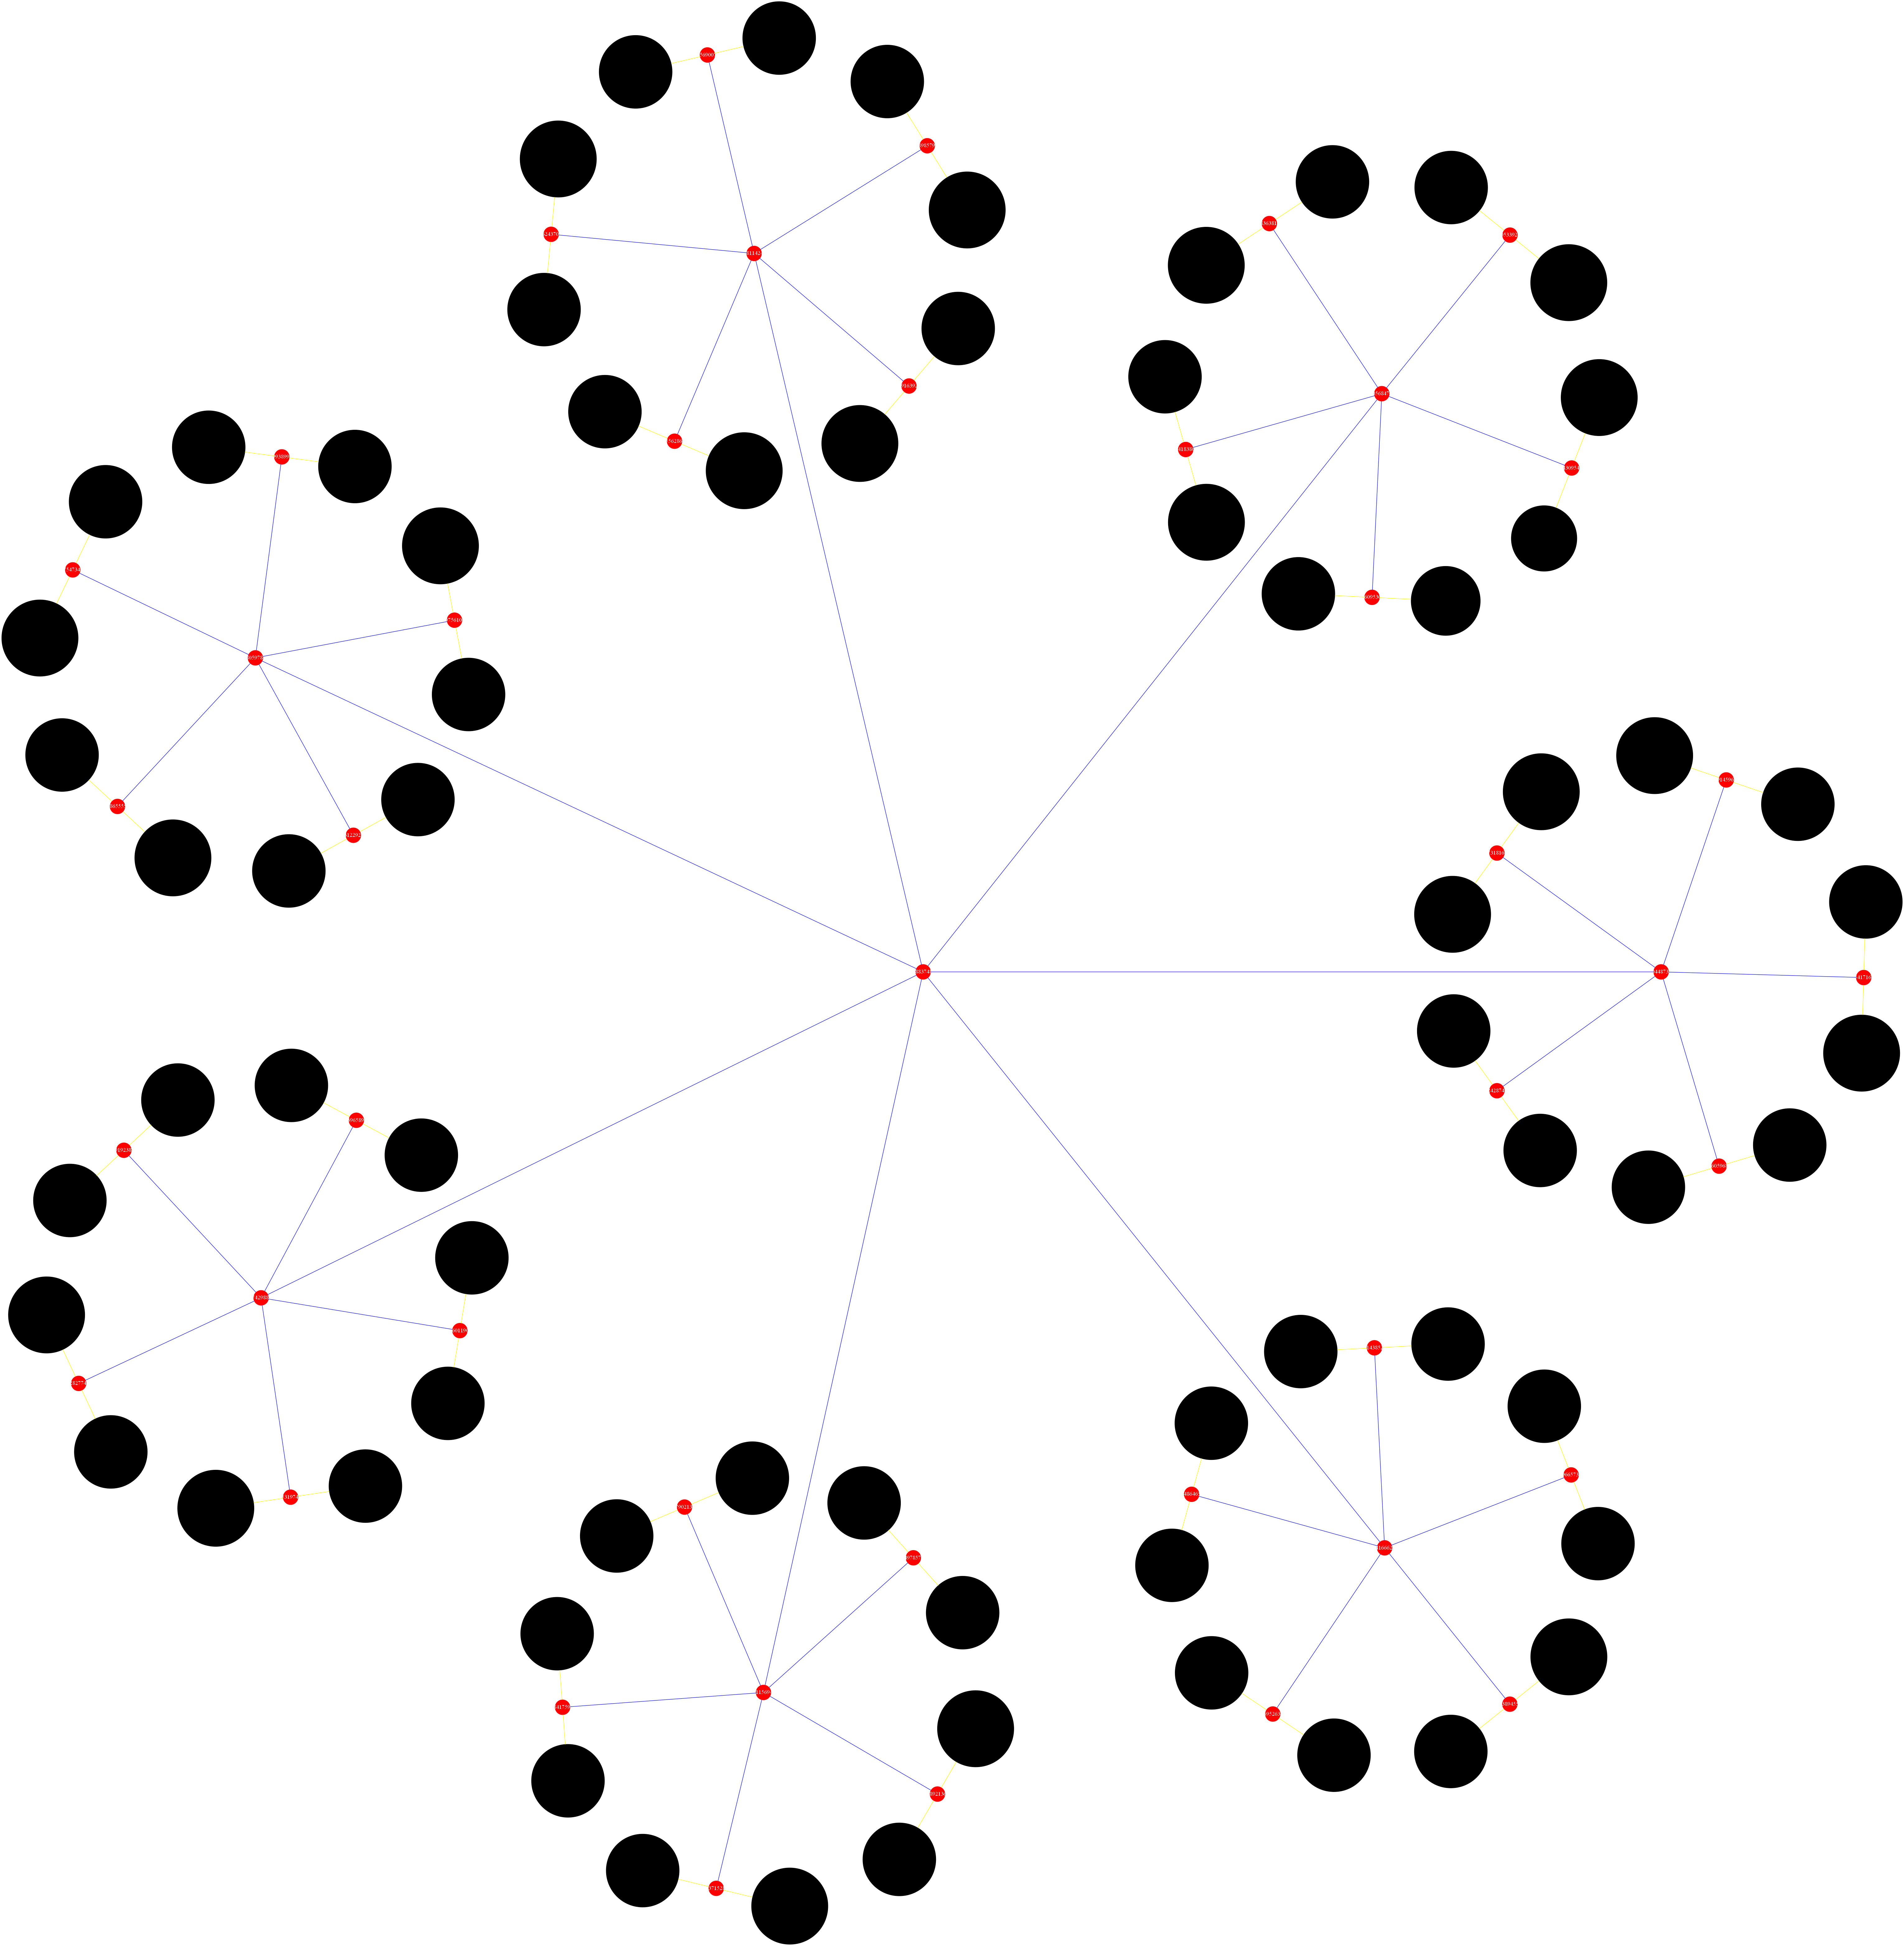

True

In [6]:
draw_factor(70,"prime_factors",True,True)

In [22]:
    def draw_factor_poster(numbers: list, fact_method: str,col:int=2,poster_name:str="poster") -> None:
        """ Create a default Matrix of factorization diagram for the given list of numbers
            
        Args:
            numbers (list): List of numbers 
            fact_method (str): Factorization function name used to get the factors

                                - prime_factors : To use the prime factors algorithme implementaion

                                - pollardrho :   To use the pollard rho algorithme implementaion
            col (int, optional): Number of column in the poster. Defaults to 2.
            poster_name (str, optional): The poster output file name. Defaults to "poster".
        """

        if not os.path.exists("../post"):
            os.mkdir("../post")
        else:
            for f in os.listdir("../post"):
                os.remove(os.path.join("../post",f))
                
        if not os.path.exists("post"):
            os.mkdir("post")
        else:
            for f in os.listdir("post"):
                os.remove(os.path.join("post",f))
        numbers.sort()
        i=0
        j=0
        for n in numbers:
                description = get_graph(n, fact_method)
                with open("InputFile.dot", "w")as file:
                    file.write(description)
                check_call(['circo','-Tpng', "-Gdpi=20" ,'InputFile.dot', '-o',
                           "../post/tmp.png"])
                os.remove("InputFile.dot")
                if i%col==0:
                        j=j+1
                        img_name="post/"+str(j)+".png"
                        img = Image.new("RGB", (152, 152), (255, 255, 255))
                        img.save(img_name, "PNG")
                image1 = Image.open('../post/tmp.png')
                image2 = Image.open(img_name)
                image1 = image1.resize((152, 152))
                draw = ImageDraw.Draw(image1)
                draw.text((0,0),str(n),(255,0,0))
                image1_size = image1.size
                image2_size = image2.size
                new_image = Image.new('RGB',(image1_size[0]+image2_size[0]+80,image2_size[1]),(255,255,255))
                new_image.paste(image2,(0,0))
                new_image.paste(image1,(image2_size[0],0))
                new_image.save(img_name,"PNG")
                i=i+1
        if get_concat_v(col):
            [f.unlink() for f in Path("post").glob("*") if f.is_file()]  
        else:
            print("Cant Delete post files")
        try:
            shutil.rmtree("../post")
            shutil.rmtree("post")
        except OSError as e:
            print("Error: %s - %s." % (e.filename, e.strerror))
                 
        return "done"

In [23]:
    def get_concat_v(k:int,poster_name:str="poster"):
        try:
            path="post"
            onlyfiles = [f for f in glob.glob(path + "**/*.png", recursive=True)]
            onlyfiles=sorted(onlyfiles, key=lambda i: int(os.path.splitext(os.path.basename(i))[0]))   
            dst = Image.new('RGB', (152+(k*233), len(onlyfiles)*152),(255,255,255))
            dst.paste(Image.open(onlyfiles[0]), (0, 0))
            for img in range(1,len(onlyfiles)):
                img1=Image.open(onlyfiles[img])
                dst.paste(img1, (0, img*img1.height))
            im1 = dst.crop((110, 0, 130+(k*233), (len(onlyfiles)*152) ))
            im1.save(poster_name+".png","PNG")
            display(ig(poster_name+".png"))
            return True
        except Exception as e:
            print(e)
            return False

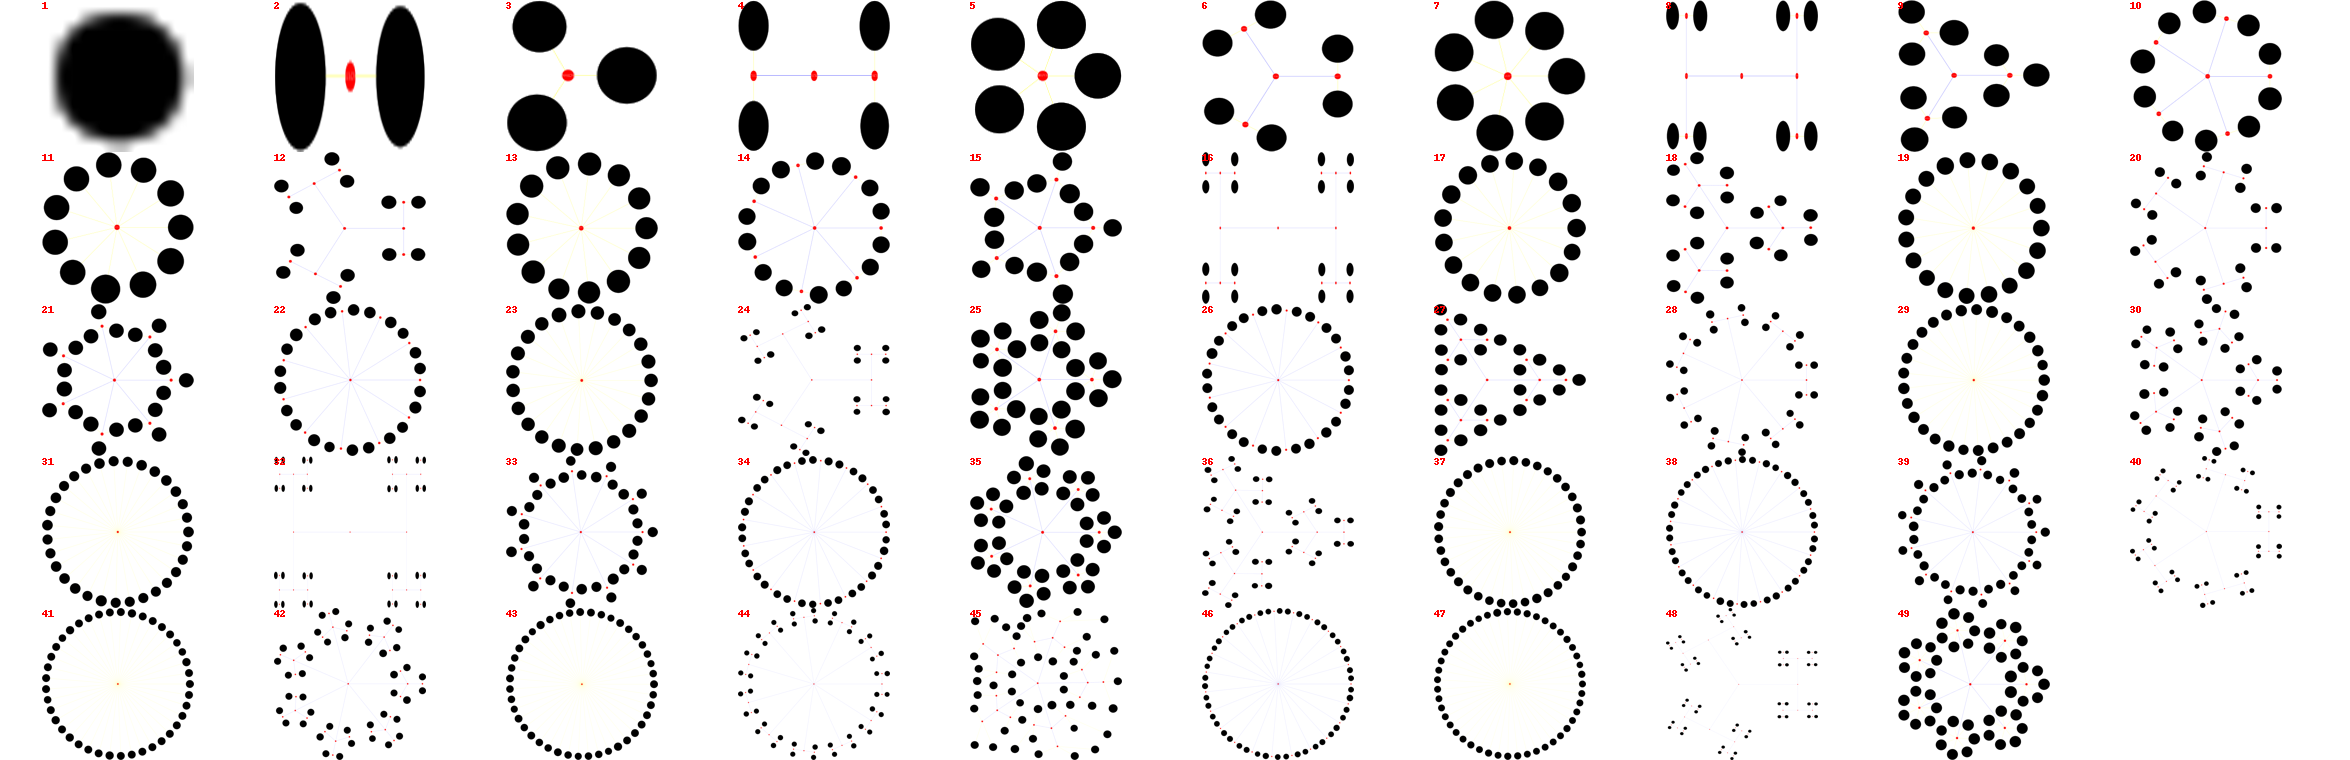

'done'

In [24]:
draw_factor_poster(list(range(1,50)), "prime_factors",10,"poster")

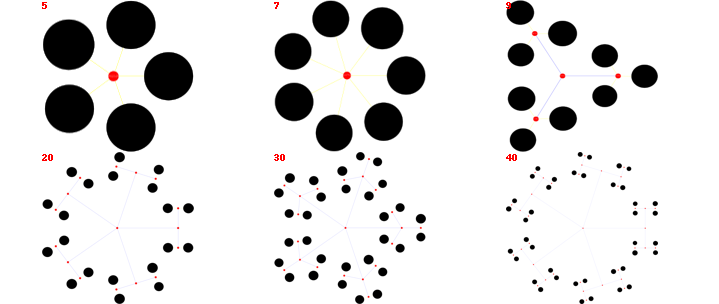

'done'

In [26]:
draw_factor_poster([9,20,5,40,7,30], "prime_factors",3,"poster")